### Install modules using pip

In [34]:
import sys
print(sys.executable)

/usr/bin/python3.6


In [36]:
#! pip install module_name

### Import libraries

In [17]:
import numpy as np
import pandas as pd
import zipfile
import os
from subprocess import check_output
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Load data from Kaggle

In [16]:
#Training data
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10038/99000/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1538581780&Signature=AuTF4au9l3fRquIu5d3HY753GruZe2bJ35BdQZVOsKnSv%2BeLRBd%2Fw91Ekjbi%2B%2BKn%2BerH1UR%2F%2B4pq3nLv0ibNNJIGXBunj0NkX2AAC%2Bk6MJvRZmI1QK7h%2B5egypI9XBn032Ou6doaxJXJwCH5oKhX%2B%2FRMmaCj4yNOBgzma0ZVnW4JumTzrBZvuCjVVvmy2qKmmWYygpHjYEb1vgO2eBYMQnHvo%2B799om7fxBKM1Wvecmr3Gg%2F8Lo%2FuEavt9l%2BJw%2FJnTtgn277511FDTRzh%2FVE%2B%2Bf%2FOAO28XuL1XeI1wJqAqXF5wKgAlQbC5fSUth6AbT1EYY28hw4hnsPI%2BhTXuLOvg%3D%3D" -O "data/train.csv.zip" -c

#Test data
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10038/99000/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1538581851&Signature=ApVTa%2B1O9KLvEVSVBF1xDnNgvZ%2BO6ezJlt1Vy%2BUKJ%2FsBWTqDg2e%2BT5kX2%2Bhsvgm3l3jng7yH2mX%2F30qQ4SszM72JVS5uiRycsVC1uyJOQsNTu3ciN1zEtUo2Q7n9gGHhwdyxGSUSMQ8887Ux%2FHL0hH6JgpL8wxttvSLhJSdjK6FaCfsHCcP9NBt4gzvUjIl8BmjjX9gvoxoKy%2BvgTwT%2FJddfbmkDjO7ijG%2BHUrEV9KYNUFIRzj4nU72mARcK68stkbck788sFcLRq5tUNNOMPCpU6JoVMAs%2Bb5PGQxqWAPg%2FcA03F9qYYz5Sjz7kVr6yfhY9c4FWnWqM1EIlFmSqBA%3D%3D" -O "data/test.csv.zip" -c

#Sample Sumbmission
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10038/99000/sample_submission.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1538581898&Signature=lE%2BqBLECEqlKRIfqYKin%2BtQVzOhC8rpMxRjuLUO4t%2FJQPHBn%2B7X%2FNlBqOgJiOIIOJHtfGdSG9GgaVCVIrFXvvwXf6Nat2vtCEefyE5wcufG21MmruFdSTf3r2hJGdqMMCzprRz%2FM5xNyfNQ7JVc%2FtXwI5JlA8AbdpVuk%2Fq6HvfrzakRU60qnvHrnWmLpPl4IdWBlvZFWVgWXQR%2BC%2FnKx8hATeS3pPym9UuqgL5mg5Tyv85E1M76r8%2BNYBi22c0e36ojrbBUYRfDV29mHuySknYINVNgSTvYOVf%2B%2BEMIeumVnzmie0SPw2fs9VAo2CJDUbrutOMclQMNyrLJBkvDhnw%3D%3D" -O "data/sample_submission.csv.zip" -c



--2018-09-30 16:14:07--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10038/99000/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1538581780&Signature=AuTF4au9l3fRquIu5d3HY753GruZe2bJ35BdQZVOsKnSv%2BeLRBd%2Fw91Ekjbi%2B%2BKn%2BerH1UR%2F%2B4pq3nLv0ibNNJIGXBunj0NkX2AAC%2Bk6MJvRZmI1QK7h%2B5egypI9XBn032Ou6doaxJXJwCH5oKhX%2B%2FRMmaCj4yNOBgzma0ZVnW4JumTzrBZvuCjVVvmy2qKmmWYygpHjYEb1vgO2eBYMQnHvo%2B799om7fxBKM1Wvecmr3Gg%2F8Lo%2FuEavt9l%2BJw%2FJnTtgn277511FDTRzh%2FVE%2B%2Bf%2FOAO28XuL1XeI1wJqAqXF5wKgAlQbC5fSUth6AbT1EYY28hw4hnsPI%2BhTXuLOvg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.176, 2607:f8b0:4004:801::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60345514 (58M) [application/zip]
Saving to: ‘data/train.csv.zip’

data/train.csv.zip  100%[===================>]  57.55M  77.4MB/s    in 0.7s    

2018-0

In [17]:
# Current directory
os.getcwd()

'/home/nbuser/DS_2018/GA_customer_revenue_prediction'

In [18]:
#Unzip files
dir_name = '/home/nbuser/DS_2018/GA_customer_revenue_prediction/data'
extension = ".zip"

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = dir_name + "/" + item
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

### Custom functions

In [2]:
#Describe a pandas dataframe
def advanced_describe(df):
    # get descriptive stats for dataframe for 'all' column dtypes
    desc = df.describe(include='all').T
    desc.drop(['top', 'freq', 'unique'], axis=1, inplace=True)
    
    # update column counts (df.describe() returns NaN for non-numeric cols)
    counts = pd.Series({ col: df[col].count() for col in df.columns })
    desc.update(counts.to_frame('count'))
    
    # add missing count/%
    missings = df.isnull().sum()
    desc = pd.concat([desc, missings.to_frame('missing')], axis=1)
    desc['missing%'] = (desc['missing'] / len(desc)).round(2)

    # add unique counts/%
    uniques = pd.Series({ col: len(df[col].unique()) for col in df.columns })
    desc = pd.concat([desc, uniques.to_frame('unique')], axis=1)
    desc['unique%'] = (desc['unique'] / len(desc)).round(2)
    
    unique_vals = pd.Series({ col: df[col].unique() for col in df.columns if len(df[col].unique()) < 20 })
    desc = pd.concat([desc, unique_vals.to_frame('unique_values')], axis=1)
    
    # add col dtype
    dtypes = pd.Series({ col: df[col].dtype for col in df.columns })
    desc = pd.concat([desc, dtypes.to_frame('dtype')], axis=1)
    
    return desc

In [3]:
#Just for display of DF on Notebook
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [4]:
#JSON Loader
def load_df(csv_path, nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

### Load data

In [6]:
%%time
train_data = load_df('data/train.csv',1000)

Loaded train.csv. Shape: (1000, 54)
CPU times: user 204 ms, sys: 0 ns, total: 204 ms
Wall time: 498 ms


In [7]:
display_all(train_data.head(5).transpose())

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
date,20160902,20160902,20160902,20160902,20160902
fullVisitorId,1131660440785968503,377306020877927890,3895546263509774583,4763447161404445595,27294437909732085
sessionId,1131660440785968503_1472830385,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,27294437909732085_1472822600
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1472830385,1472880147,1472865386,1472881213,1472822600
visitNumber,1,1,1,1,2
visitStartTime,1472830385,1472880147,1472865386,1472881213,1472822600
device.browser,Chrome,Firefox,Chrome,UC Browser,Chrome
device.browserSize,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [ ]:
#Test data
#test_data = load_df('data/test.csv')

In [8]:
#Sample submission
sample = pd.read_csv('data/sample_submission.csv')

In [9]:
sample.head(5)

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.0
1,0000049363351866189,0.0
2,0000053049821714864,0.0
3,0000059488412965267,0.0
4,0000085840370633780,0.0


### EDA

In [10]:
advanced_describe(train_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,count,mean,std,min,25%,50%,75%,max,missing,missing%,unique,unique%,unique_values,dtype
channelGrouping,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,6,0.11,"[Organic Search, Referral, Paid Search, Affili...",object
date,1000,2.01609e+07,0,2.01609e+07,2.01609e+07,2.01609e+07,2.01609e+07,2.01609e+07,0,0.00,1,0.02,[20160902],int64
device.browser,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,10,0.19,"[Chrome, Firefox, UC Browser, Internet Explore...",object
device.browserSize,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object
device.browserVersion,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object
device.deviceCategory,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,3,0.06,"[desktop, mobile, tablet]",object
device.flashVersion,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object
device.isMobile,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,2,0.04,"[False, True]",bool
device.language,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object
device.mobileDeviceBranding,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object


In [22]:
pd.value_counts(train_data["geoNetwork.subContinent"],normalize=True)

Western Europe      0.23
Southeast Asia      0.11
Northern Europe     0.10
Eastern Europe      0.09
Southern Europe     0.08
Southern Asia       0.08
Eastern Asia        0.07
South America       0.07
Northern America    0.04
Australasia         0.04
Central America     0.04
Western Asia        0.04
Western Africa      0.01
Name: geoNetwork.subContinent, dtype: float64

In [11]:
train_data["totals.transactionRevenue"] = train_data["totals.transactionRevenue"].astype('float')
revenue = train_data.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

In [13]:
revenue.tail()

,fullVisitorId,totals.transactionRevenue
939,9960353142606371996,0.0
940,9966505186635465691,0.0
941,9976108007685501102,0.0
942,9987056085213279488,0.0
943,9991882289486375263,0.0


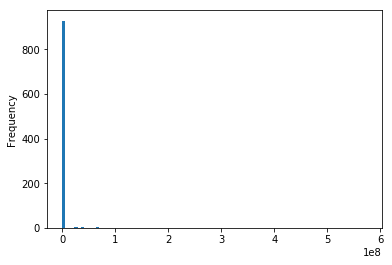

In [20]:
revenue["totals.transactionRevenue"].plot.hist(bins = 100)

In [21]:
# Check for 80/20 rule

In [39]:
revenue.sort_values(by = ["totals.transactionRevenue"],ascending=False,inplace=True)
revenue = revenue.assign(cum_revenue = revenue["totals.transactionRevenue"].cumsum())
revenue = revenue.assign(cum_revenue_pct = revenue["totals.transactionRevenue"].cumsum()/revenue["totals.transactionRevenue"].sum())
#Number of customers who contribute to 80% of revenue
(revenue[revenue.cum_revenue_pct <= 0.81].fullVisitorId.nunique())

5

In [43]:
#% of customers who contribute to 80% of revenue
((revenue[revenue.cum_revenue_pct <= 0.81].fullVisitorId.nunique())/revenue.shape[0])

0.005296610169491525

### Clean up

In [44]:
#remove csv files to save on memory charges
dir_name = '/home/nbuser/DS_2018/GA_customer_revenue_prediction/data'
extension = ".csv"
for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension):
        file_name = dir_name + "/" + item
        os.remove(file_name) # delete csv file